In [ ]:
EDA-Yelp-User-StevenLuo


In [ ]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("final_data.csv")

user = df[['user_id', 'name_y', 'review_count_y', 'yelping_since', 'useful_y', 'funny_y', 'cool_y', 'elite', 'friends',
             'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list',
             'compliment_funny', 'compliment_writer', 'compliment_photos']].drop_duplicates()

/var/folders/nn/rxq3j2z12y77sbcsl3g882bw0000gn/T/ipykernel_18333/1216256130.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_data.csv")


In [ ]:
# Measures of central tendency for given data
user.describe()

,review_count_y,useful_y,funny_y,cool_y,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_funny,compliment_writer,compliment_photos
count,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000,88072.000000
mean,66.573894,171.238657,85.660187,115.364100,5.779135,3.908224,10.223874,1.274696,0.941684,0.713496,0.294089,14.494425,5.339472,6.691502
std,181.346247,1639.293150,1132.544880,1471.898465,39.517494,0.817052,201.918748,20.475402,23.314699,14.619065,7.678729,238.688310,88.583676,178.527232
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,0.000000,0.000000,0.000000,3.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,12.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,48.000000,12.000000,14.000000,2.000000,4.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8363.000000,205765.000000,173096.000000,199878.000000,3642.000000,5.000000,25411.000000,2986.000000,4242.000000,2516.000000,1397.000000,24970.000000,9821.000000,28205.000000


In [ ]:
missing_values = user.isnull().sum()
print(missing_values)

user_id                   0
name_y                    0
review_count_y            0
yelping_since             0
useful_y                  0
funny_y                   0
cool_y                    0
elite                 78235
friends               27689
fans                      0
average_stars             0
compliment_hot            0
compliment_more           0
compliment_profile        0
compliment_cute           0
compliment_list           0
compliment_funny          0
compliment_writer         0
compliment_photos         0
dtype: int64


In [ ]:
duplicate_users = user[user.duplicated(subset='user_id', keep=False)]
print(f"Number of duplicate user entries: {len(duplicate_users)}")

Number of duplicate user entries: 0


In [ ]:
# Summarize the DataFrame to understand the distribution of data
summary = user.describe(include='all')
print(summary)

                       user_id name_y  review_count_y        yelping_since  \
count                    88072  88072    88072.000000                88072   
unique                   88072  15518             NaN                88052   
top     X_DkwPTzdO_VWzUcbUXREg  David             NaN  2006-11-22 00:32:22   
freq                         1    671             NaN                    2   
mean                       NaN    NaN       66.573894                  NaN   
std                        NaN    NaN      181.346247                  NaN   
min                        NaN    NaN        0.000000                  NaN   
25%                        NaN    NaN        6.000000                  NaN   
50%                        NaN    NaN       17.000000                  NaN   
75%                        NaN    NaN       51.000000                  NaN   
max                        NaN    NaN     8363.000000                  NaN   

             useful_y        funny_y         cool_y            

In [ ]:
print(f"The dataset contains {len(user)} rows.")

The dataset contains 88072 rows.


1. Data Preprocessing: Add columns

- Column for number of friends
- Column to keep count of number of years of elite status
- Column to track the user join time - keep user since YR, and since YRMO

In [ ]:
# Column for number of friends

# Make sure the 'friends' column is treated as a string, replacing NaNs with an empty string
user['friends'] = user['friends'].fillna('').astype(str)

# Calculate the friend count by splitting the 'friends' string by commas and getting the length of the resulting list
user['friend_count'] = user.apply(lambda row: 0 if row['friends'] == '' else len(row['friends'].split(',')), axis=1)

In [ ]:
# Drop column friends as not used again
user = user.drop(["friends"], axis=1)
user.head()

,user_id,name_y,review_count_y,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_funny,compliment_writer,compliment_photos,friend_count
0,X_DkwPTzdO_VWzUcbUXREg,Eric,1710,2008-08-08 18:05:19,17482,6899,14416,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",204,4.13,134,23,28,2,3,427,190,37,1668
1,aVYPqQQMGGvD5aFic_haQQ,Elizabeth,198,2015-02-22 23:06:25,422,171,309,"2019,20,20,2021",10,4.13,1,0,0,0,0,6,0,7,44
2,s9fVoZFkzWniPe8b9FtyOg,Joe,14,2017-01-09 21:38:36,21,5,1,NaN,0,1.86,0,0,0,0,0,0,0,0,0
4,OZ1NmK2RLv0UxGFABE0CHw,David,292,2013-06-03 19:19:49,395,123,170,"2015,2016",33,4.02,6,2,2,0,1,9,8,2,127
9,QWKPQiqH_o_ARgpldmB1CQ,Anne,159,2012-02-19 20:06:42,299,86,241,"2016,2017,2018,2019,20,20,2021",14,4.57,14,6,3,1,0,62,20,17,111


In [ ]:
# Make Column elite_count to keep count of number of years of elite status

# Convert 'elite' column to string and replace NaNs
user['elite'] = user['elite'].fillna('').astype(str)

# Calculate 'elite_count' as the number of comma-separated years listed in 'elite' column
user['elite_count'] = user['elite'].apply(lambda x: 0 if not x else len(x.split(',')))

# Now you can safely drop the 'elite' column if it's no longer needed
user = user.drop(['elite'], axis=1)


In [ ]:
# Add Columns to track the user join time - keep user since YR, and since YRMO

user['yelping_since'] = pd.to_datetime(user['yelping_since'])

user['yelp_since_YRMO'] = user['yelping_since'].map(lambda x: 100*x.year + x.month)
user['yelp_since_year'] = user['yelping_since'].dt.year

user.head()

,user_id,name_y,review_count_y,yelping_since,useful_y,funny_y,cool_y,fans,average_stars,compliment_hot,...,compliment_profile,compliment_cute,compliment_list,compliment_funny,compliment_writer,compliment_photos,friend_count,elite_count,yelp_since_YRMO,yelp_since_year
0,X_DkwPTzdO_VWzUcbUXREg,Eric,1710,2008-08-08 18:05:19,17482,6899,14416,204,4.13,134,...,28,2,3,427,190,37,1668,11,200808,2008
1,aVYPqQQMGGvD5aFic_haQQ,Elizabeth,198,2015-02-22 23:06:25,422,171,309,10,4.13,1,...,0,0,0,6,0,7,44,4,201502,2015
2,s9fVoZFkzWniPe8b9FtyOg,Joe,14,2017-01-09 21:38:36,21,5,1,0,1.86,0,...,0,0,0,0,0,0,0,0,201701,2017
4,OZ1NmK2RLv0UxGFABE0CHw,David,292,2013-06-03 19:19:49,395,123,170,33,4.02,6,...,2,0,1,9,8,2,127,2,201306,2013
9,QWKPQiqH_o_ARgpldmB1CQ,Anne,159,2012-02-19 20:06:42,299,86,241,14,4.57,14,...,3,1,0,62,20,17,111,7,201202,2012


2. EDA

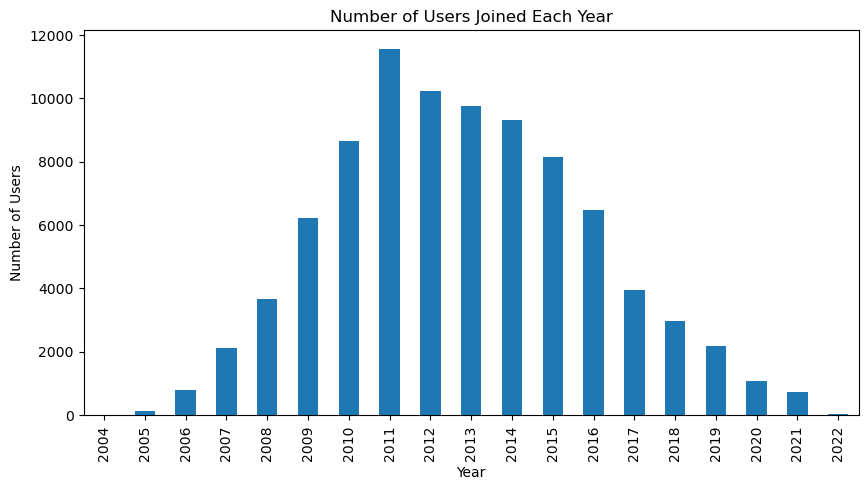

In [ ]:
# Time Series Analysis

# Analyze yearly trends
yearly_join_counts = user['yelp_since_year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
yearly_join_counts.plot(kind='bar')
plt.title('Number of Users Joined Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.show()

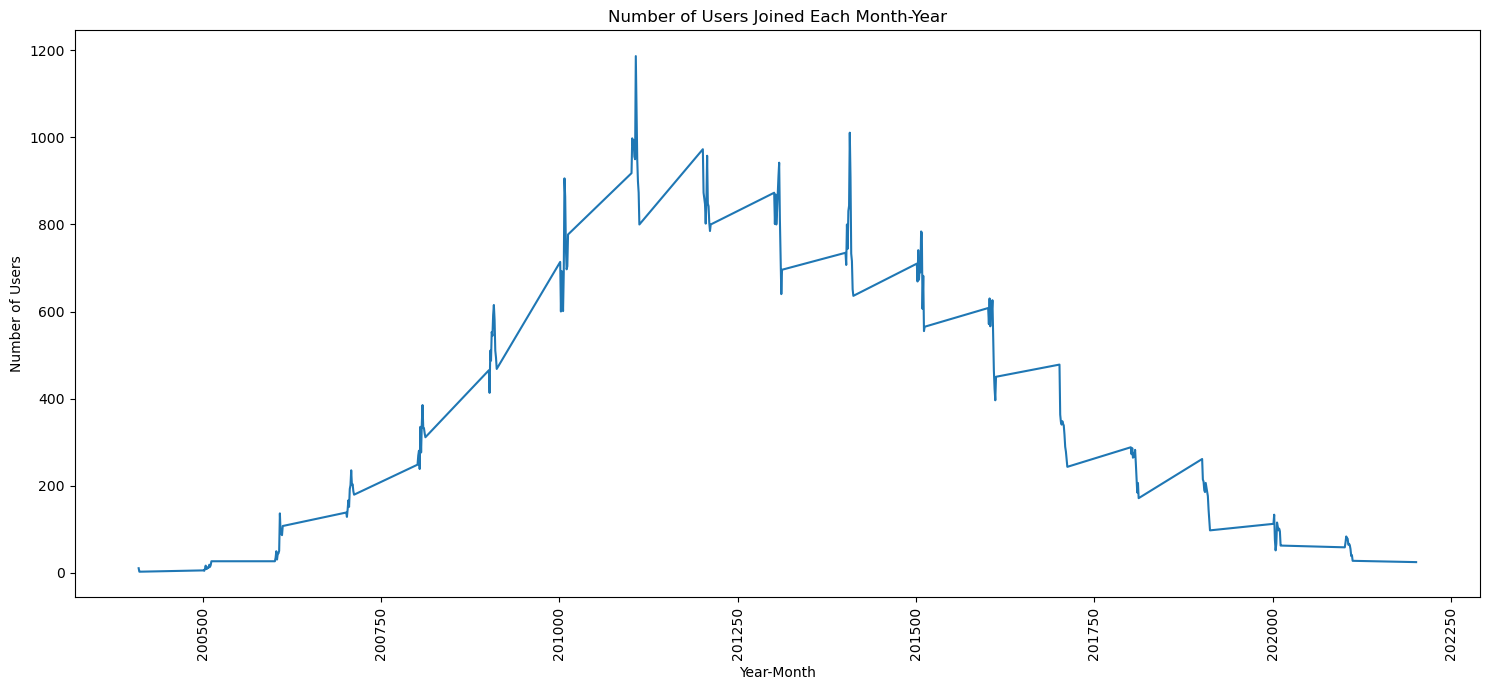

In [ ]:
# Analyze month-year trends
yrmo_join_counts = user['yelp_since_YRMO'].value_counts().sort_index()
plt.figure(figsize=(15, 7))
yrmo_join_counts.plot(kind='line')
plt.title('Number of Users Joined Each Month-Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

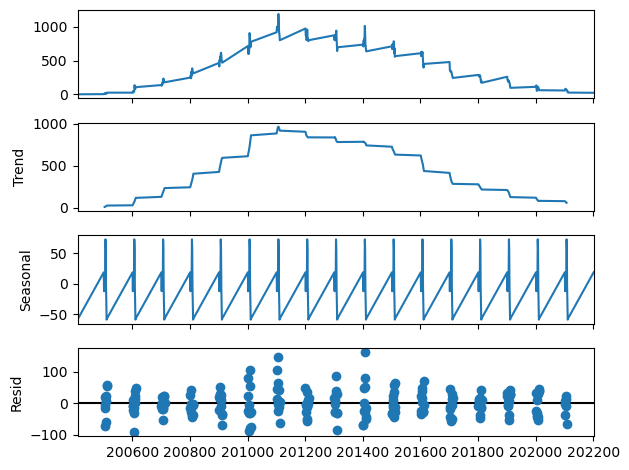

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate data by year-month to get the number of new users each month
monthly_users = user.groupby('yelp_since_YRMO').size()

# The frequency is set to 12 assuming monthly data and yearly seasonality
decompose_result = seasonal_decompose(monthly_users, model='additive', period=12)

# Plot the decomposed time series
decompose_result.plot()
plt.show()

The decomposition graph is split into three components: trend, seasonal, and residual (also known as irregular), which are all key elements in time series decomposition.


Trend: This shows a long-term increase followed by a peak and a subsequent decline. This might indicate a growth phase of user activity or businesses on Yelp, peaking around 2014, and then a decrease.

Seasonal: The consistent up-and-down pattern suggests a regular seasonal effect, which could be tied to specific times of the year when user activity or business engagement is predictably higher or lower.

Residual: The bottom plot shows residuals, which are the errors of the model or the fluctuations that are not explained by the trend or seasonality. These seem to be relatively stable and random, with no clear patterns, indicating the model has captured most of the systematic information in the data.


In [ ]:
# TSNE and TruncatedSVD: Cope with the Potential Sparse Data Issue

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# Since TSNE and TruncatedSVD are unsupervised dimensionality reduction techniques,
# we should drop non-numeric and unique identifier columns before applying these methods

# Preprocessing: Only use numeric features for SVD and TSNE
numeric_features = user.select_dtypes(include=[np.number])

# If the numeric features have missing values, you can fill them with 0 or some other appropriate value
numeric_features = numeric_features.fillna(0)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Apply Truncated SVD
# Choose n_components based on the number of features (it has to be less than or equal to the number of features)
n_components = min(scaled_features.shape[1] - 1, 50)  # Choose 50 or the number of features minus one, whichever is smaller
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_features = svd.fit_transform(scaled_features)

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(reduced_features)

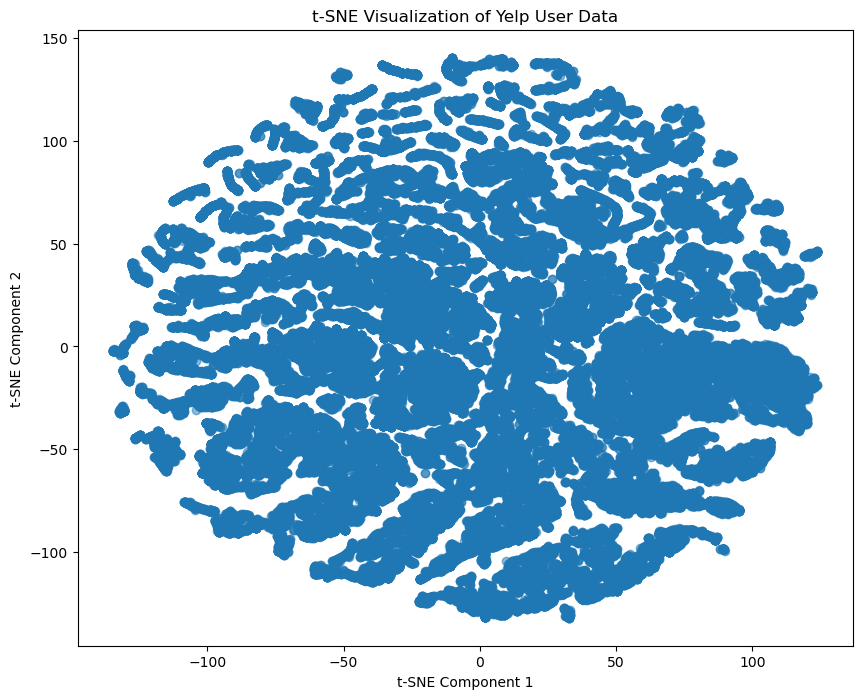

In [ ]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)

# Adding title and labels
plt.title('t-SNE Visualization of Yelp User Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Show the plot
plt.show()

Based on your description of the t-SNE visualization, it seems that the data points are densely packed and do not form distinct, well-separated clusters. This indicates that the dataset might have a lot of underlying similarities among the Yelp user data, or that the variation between different users isn't captured well in two dimensions.

It could also suggest that the hyperparameters for t-SNE may need tuning to possibly reveal more structure within the data, or that the dataset itself is too complex to be easily separable into clear clusters using t-SNE. Another possibility is that the features used may not be discriminative enough to separate the users into distinct groups.

Next we'll do further analysis with different dimensionality reduction techniques such as PCA.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

/Users/zhihaoluo/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhihaoluo/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhihaoluo/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhihaoluo/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

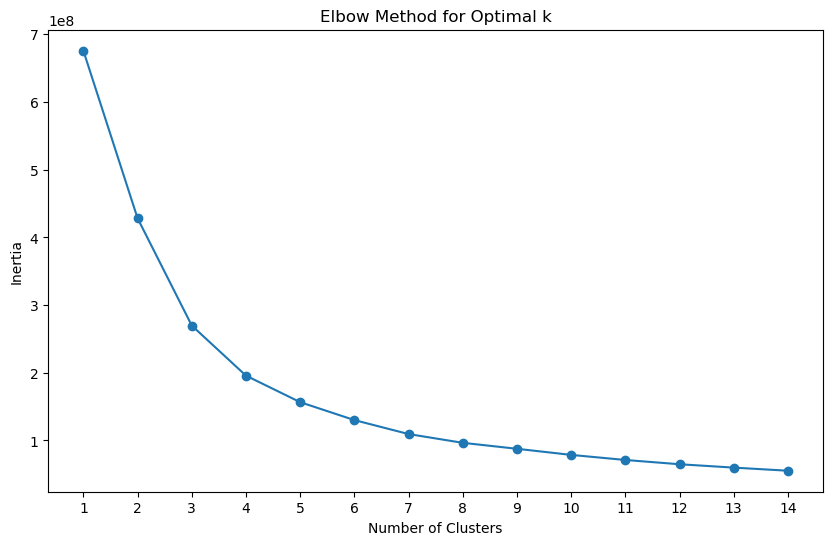

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Determine the range of k to try
k_range = range(1, 15)

# Calculate inertia for each k value
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

# The "elbow" in the plot will indicate the optimal k (where the inertia begins to decrease more slowly)
# You should select the k value at this "elbow" point to use in further analysis

From the plot, we can see that the elbow isn't very pronounced, but there seems to be a slight bend around k=4. Beyond k=4, the decrease in inertia becomes more gradual. So, we choose k=4 to be the optimal number of clusters for our t-SNE processed data.

In [ ]:
# Cluster the t-SNE results using K-Means

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

/Users/zhihaoluo/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/zhihaoluo/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


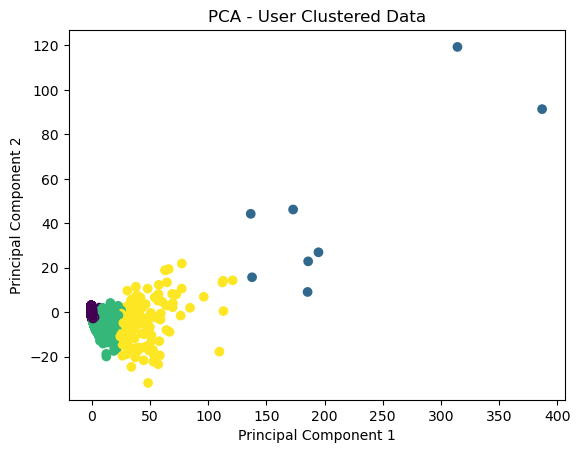

In [ ]:
# We visually inspect the plot and choose the elbow point at k=6.
optimal_number_of_clusters = 4

# Fit the final model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_number_of_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Plotting the PCA
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - User Clustered Data')
plt.show()

Based on the PCA - Clustered Data plot, here are several observations and conclusions that can be drawn:

1. Cluster Density: There is one dense cluster where the majority of the data points are concentrated. This suggests that most users have similar attributes that are being captured by the first two principal components.

2. Outliers/Peripheral Clusters: There are several points (and possibly a cluster) that are quite far from the dense cluster. These could represent users with distinct behavior patterns not common in the general Yelp user base.

3. Separation of Clusters: There is some overlap between what appears to be separate clusters, which might indicate that while there are differences, there are also similarities between these user groups.

4. Principal Component Spread: The spread along the first principal component (horizontal axis) is much greater than that of the second principal component, which suggests that the first component captures a larger variance in user behavior.


Potential Analysis Directions:

Analyzing the attributes that contribute most to the principal components could give insights into which features are driving user differences.

Understanding the characteristics of each cluster could help Yelp tailor its platform to better serve different user segments.

In the context of Yelp, this analysis could help in understanding user segments for targeted marketing, personalized recommendation systems, or community engagement strategies.

In [ ]:
# Analyzing the attributes that contribute most to the principal components

loadings = pca.components_
n_features = scaled_features.shape[1]  # Number of features in the original data

# Assuming 'df' is your original dataframe used to create 'scaled_features'
feature_names = df.columns[:n_features]  # This will need to match the columns used in 'scaled_features'

# Create a DataFrame for the feature loadings for PCA1 and PCA2
pca_loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=['PCA1', 'PCA2'])

# Sort by absolute values to find the most important features for each component
pca_loadings_df['PCA1_abs'] = pca_loadings_df['PCA1'].abs().sort_values(ascending=False)
pca_loadings_df['PCA2_abs'] = pca_loadings_df['PCA2'].abs().sort_values(ascending=False)

# Select the top features contributing to PCA1 and PCA2
pca1_top_features = pca_loadings_df.nlargest(5, 'PCA1_abs')
pca2_top_features = pca_loadings_df.nlargest(5, 'PCA2_abs')

# Display the tables
print("Top Features for PCA1:")
print(pca1_top_features[['PCA1']])
print("\nTop Features for PCA2:")
print(pca2_top_features[['PCA2']])

Top Features for PCA1:
                        PCA1
categories          0.302936
longitude           0.297000
address             0.293618
RestaurantsTakeOut  0.290968
name_x              0.287800

Top Features for PCA2:
                                PCA2
BusinessAcceptsCreditCards  0.461143
GoodForKids                 0.461041
business_id                -0.392826
RestaurantsReservations    -0.386215
Caters                     -0.271837


In [ ]:
# Re-run PCA with all features to enable the inverse transformation
pca_all = PCA(n_components=scaled_features.shape[1])
pca_all.fit(scaled_features)

# Now we can inverse transform the cluster centers
cluster_centers_original_space = pca_all.inverse_transform(kmeans.cluster_centers_)

# Convert the cluster centers to a DataFrame for easier analysis
cluster_centers_df = pd.DataFrame(cluster_centers_original_space, columns=feature_names)

# Print the cluster centers
cluster_centers_df

,business_id,name_x,address,city,state,postal_code,latitude,longitude,stars_x,review_count_x,is_open,categories,RestaurantsTakeOut,NoiseLevel,Caters,RestaurantsReservations,BusinessAcceptsCreditCards,GoodForKids
0,0.031741,-0.032074,0.106934,-0.068398,0.002719,0.034259,-0.068614,-0.161349,-0.012909,-0.111228,-0.171331,0.068126,-0.094579,-0.013356,-0.007756,-0.034280,0.020777,-0.044700
1,-66.127369,-31.843897,28.611951,-25.935166,-37.598924,20.315215,-47.757034,85.416723,-40.983037,79.438757,102.467339,-49.236648,82.154465,-50.457037,-20.619644,10.491827,-3.571218,-2.103061
2,-0.260975,1.025520,-2.379625,1.767330,0.210819,-0.692052,1.613445,2.593664,0.438905,1.618665,2.644662,-0.902074,1.441229,0.572941,0.289052,0.636051,-0.487402,0.886787
3,-8.614728,-7.494040,-0.575603,-6.309763,-5.590980,-2.907549,-0.369238,22.097689,-2.070761,18.916500,25.938361,-14.151970,13.311900,-5.114438,-2.225008,2.683763,1.170703,2.785762
